# Facebook's Prophet Library

## Importing the data

👇 Go on [trends.google.com](https://trends.google.com/trends/?geo=US) and retrieve the dataset representing the interest over time of the keyword `data science` since 2004 in the US. Once you get the dataset, import the data and display the first few rows

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://drive.google.com/uc?export=download&id=1GTup48HKTMqT9ZWI02vG65thl7zEBPLK')

## Display the data

👇Visualize the data by displaying the first few rows of the dataframe

In [13]:
df

,Month,data science: (United States)
0,2004-01,17
1,2004-02,13
2,2004-03,11
3,2004-04,6
4,2004-05,6
...,...,...
195,2020-04,82
196,2020-05,80
197,2020-06,78
198,2020-07,77


## Data Preprocessing

Facebook'Prophet library requires the data to be in a specific format

👇 Format the dataset as per Facebook Prophet's requirements.
Remember the dataframe should have a `ds` and `y` columns

In [11]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
195,2020-04-01,82
196,2020-05-01,80
197,2020-06-01,78
198,2020-07-01,77
199,2020-08-01,62


## Plotting the data

👇 Plot the data

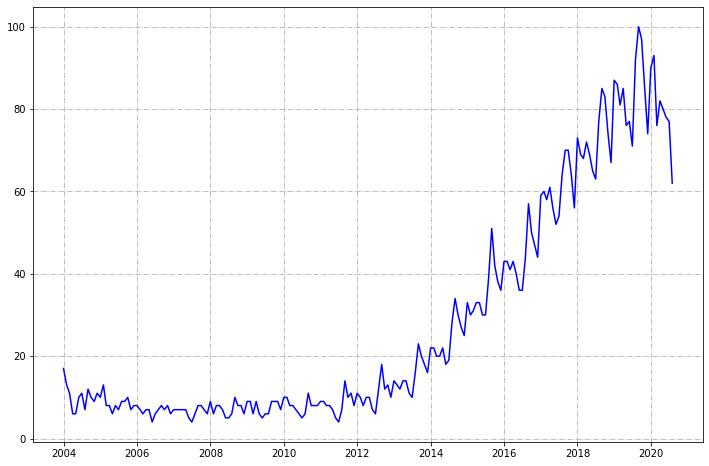

In [4]:
plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(df['ds'], df['y'], 'b')
plt.show()

## Fitting the data

👇 Fit the data using Facebook's Prophet library. Make sure to use a train/test split. 


In [6]:
from prophet import Prophet
train = df.iloc[:176]
test = df.iloc[176:]

In [7]:
train.shape, test.shape

((176, 2), (24, 2))

In [8]:
train

,ds,y
0,2004-01-01,17
1,2004-02-01,13
2,2004-03-01,11
3,2004-04-01,6
4,2004-05-01,6
...,...,...
171,2018-04-01,72
172,2018-05-01,69
173,2018-06-01,65
174,2018-07-01,63


In [9]:
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -14.5397
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       512.612     0.0369695       286.114           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       517.559   0.000475654       109.193   1.062e-06       0.001      198  LS failed, Hessian reset 
     199       520.087   0.000300536       80.8026      0.5137      0.5137      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       520.335   0.000101429       39.9896   2.484e-06       0.001      359  LS failed, Hessian reset 
     299       520.441   0.000282948       33.6512      0.6875      0.6875      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     365       520.521   3.12689e-07       21.9772   7.788e-09       0.001      592  LS failed, Hessian rese

/Users/hamzabenkirane/.pyenv/versions/3.8.12/envs/projectwind/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


## Make future predictions

👇Before predicting future values with Facebook's Prophet library, you first need to create a placeholder dataframe that will eventually hold the predictions. Once you create the dataframe, try to predict 2 years in the future.

You can create the predictions' dataframe using `make_future_dataframe()`

In [18]:
horizon = 36
future = model.make_future_dataframe(periods = horizon,freq='MS')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/Users/hamzabenkirane/.pyenv/versions/3.8.12/envs/projectwind/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/hamzabenkirane/.pyenv/versions/3.8.12/envs/projectwind/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
207,2021-04-01,109.196977,103.155147,115.228651
208,2021-05-01,102.418519,96.640914,108.118792
209,2021-06-01,93.912361,87.906534,99.357675
210,2021-07-01,93.489536,86.771523,99.323806
211,2021-08-01,113.117309,106.080867,120.187560


## Plotting the forecast

👇 It's time to visualize our forecast. Try to first plot it using [`model.plot(forecast)`](https://facebook.github.io/prophet/docs/quick_start.html)

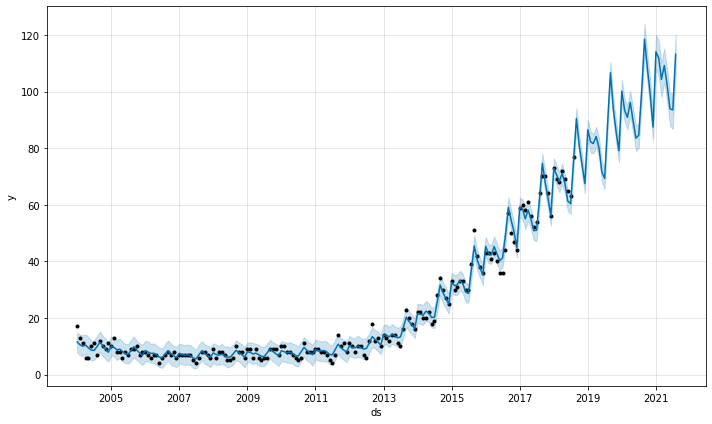

In [19]:
ax = model.plot(forecast);

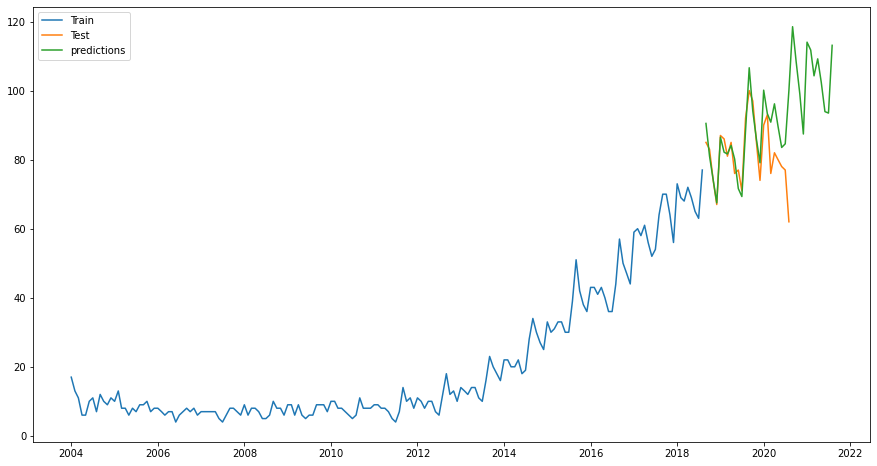

In [20]:
plt.figure(figsize=(15, 8))
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

👉 From 2004 to 2018 we can see the train data and the forecasted data from 2018 to 2020.

We can also notice a shaded region behind the plot which represents the 95% uncertainty interval.

The black dots represent the original data

## Time Series' trend and seasonality

👇 Plot the trend and yearly seasonality of the time series. This can be done using the `plot_components()` function from Facebook's Prophet Library

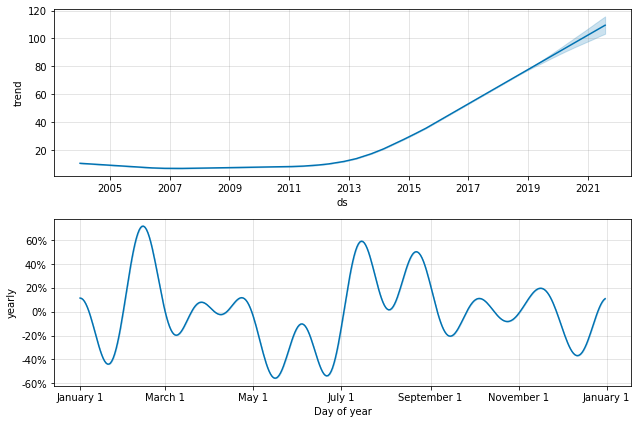

In [0]:
model.plot_components(forecast);

## Evaluating the model with cross-validation!

👇 Using `cross_validation()` and `performance_metrics()` from [fbprophet.diagnostics](https://facebook.github.io/prophet/docs/diagnostics.html), evaluate the performance of your model

<img src='https://facebook.github.io/prophet/static/diagnostics_files/diagnostics_3_0.png'>

More precisely, create a Time Series K-fold CV with
- train sets of size 5 years
- horizon val sizes of 1 years
- shifting each fold by 180 days

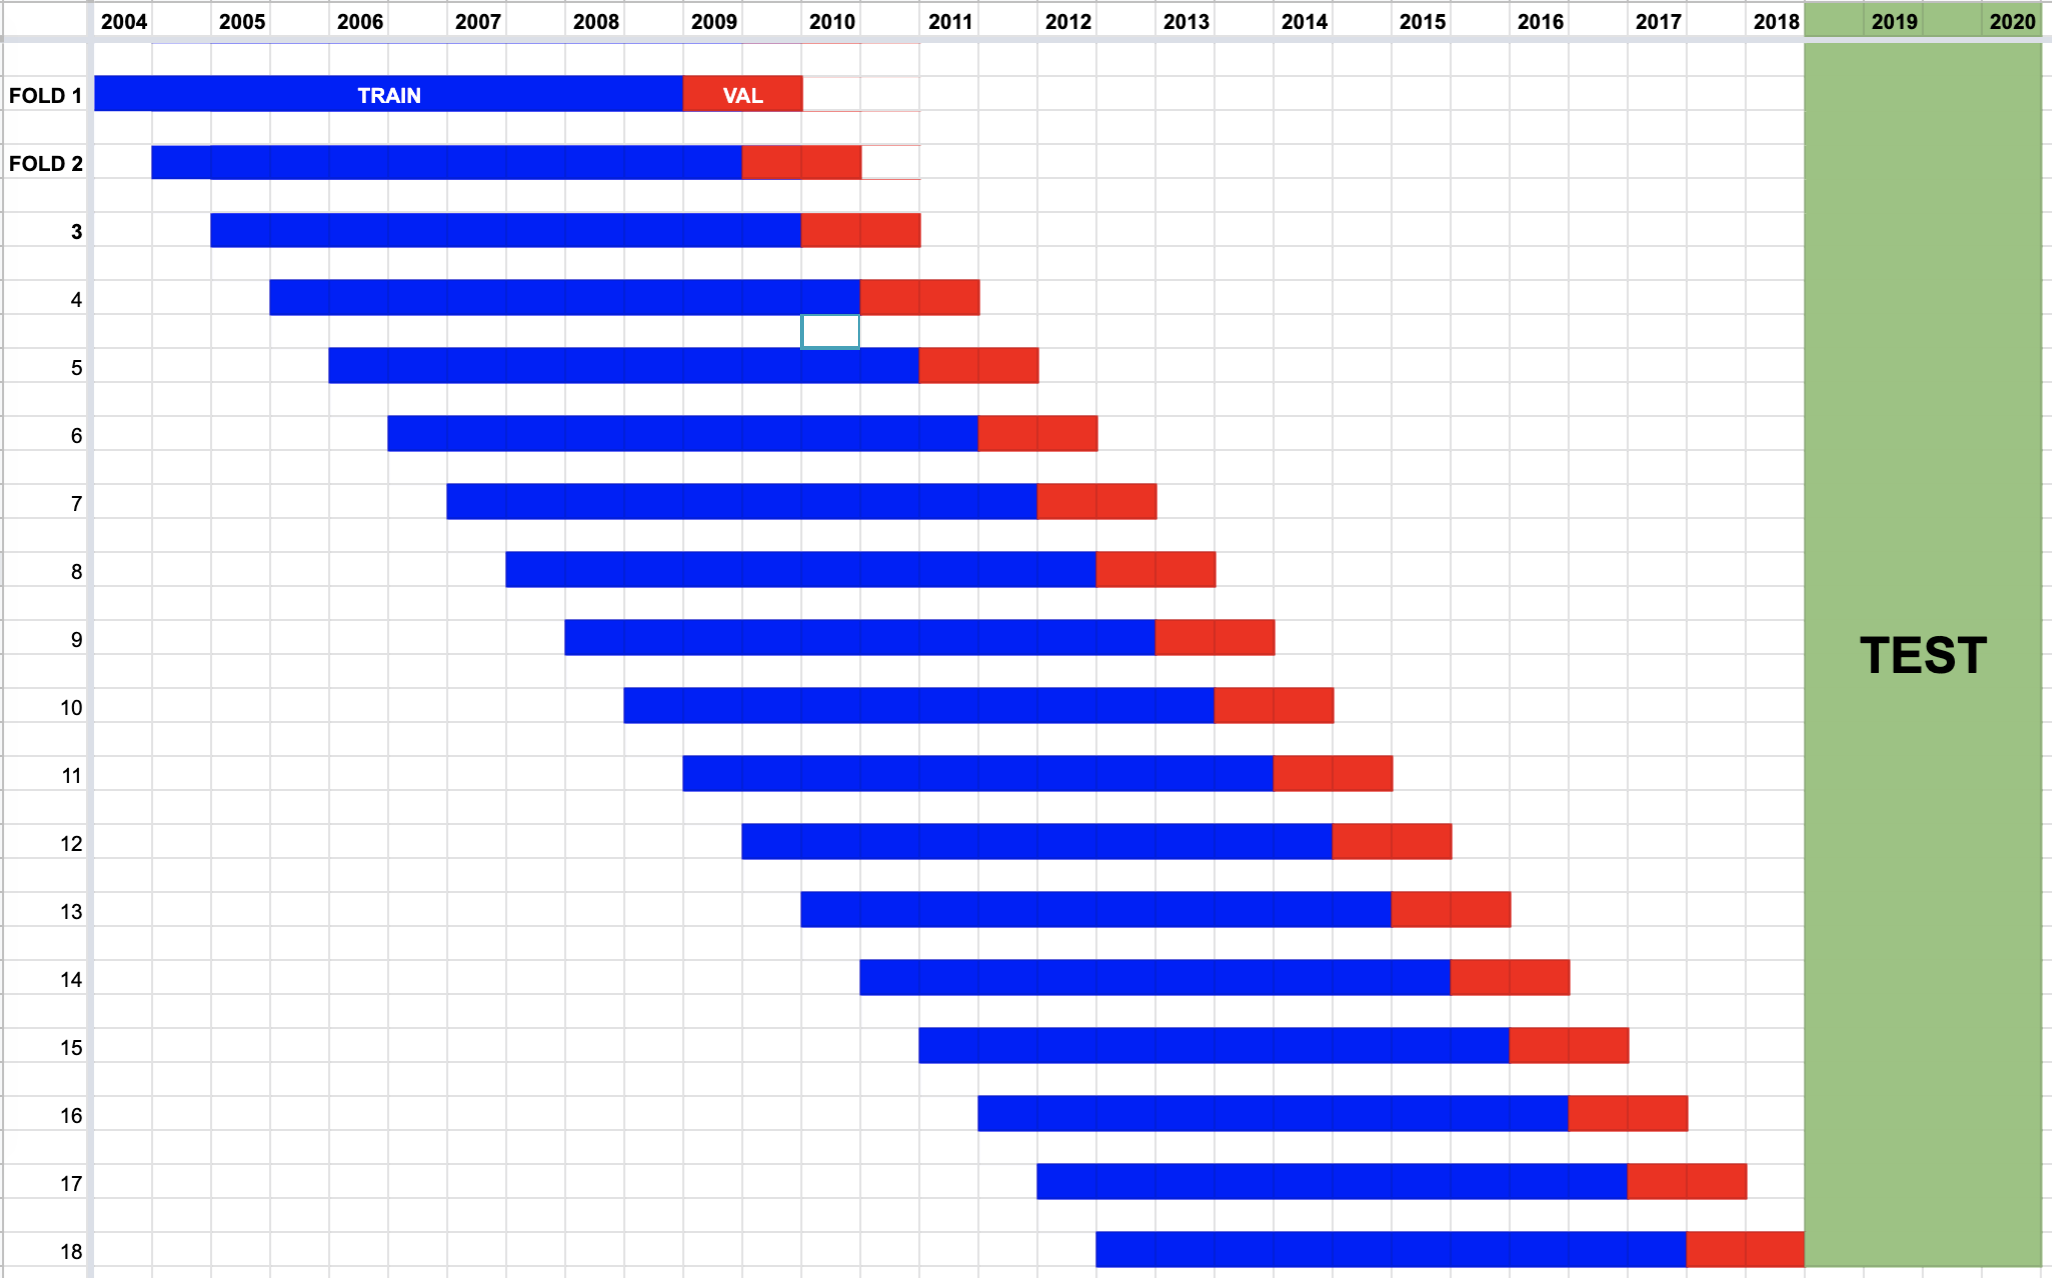

In [0]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
# Your code here
cv_results = cross_validation(model=model, initial=f'{365 * 5} days', horizon='365 days', period='180 days')

INFO:fbprophet:Making 18 forecasts with cutoffs between 2009-03-16 00:00:00 and 2017-08-01 00:00:00


In [0]:
cv_results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2009-04-01,5.751283,3.691988,7.691148,9,2009-03-16
1,2009-05-01,5.326935,3.221469,7.582533,6,2009-03-16
2,2009-06-01,5.545978,3.463167,7.567039,5,2009-03-16
3,2009-07-01,5.753368,3.723785,7.809476,6,2009-03-16
4,2009-08-01,5.892877,3.933401,7.938220,6,2009-03-16
...,...,...,...,...,...,...
211,2018-04-01,69.299446,66.009516,72.860735,72,2017-08-01
212,2018-05-01,65.433413,62.119869,68.990909,69,2017-08-01
213,2018-06-01,57.256607,53.805635,60.855347,65,2017-08-01
214,2018-07-01,57.291812,53.856327,61.222595,63,2017-08-01


In [0]:
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,19.275358,4.390371,3.614358,0.166003,0.142537,0.428571
1,40 days,20.990843,4.581576,3.874193,0.176948,0.156110,0.380952
2,42 days,19.461396,4.411507,3.718677,0.167440,0.156110,0.380952
3,45 days,20.519688,4.529866,3.864517,0.167308,0.156110,0.333333
4,46 days,18.898364,4.347225,3.616866,0.160489,0.142537,0.380952
...,...,...,...,...,...,...,...
165,359 days,37.151828,6.095230,4.857991,0.200348,0.157433,0.285714
166,360 days,40.205772,6.340802,5.234518,0.205768,0.157433,0.238095
167,361 days,39.842233,6.312070,5.137276,0.202975,0.157433,0.261905
168,364 days,39.564530,6.290034,5.088617,0.198921,0.157433,0.285714


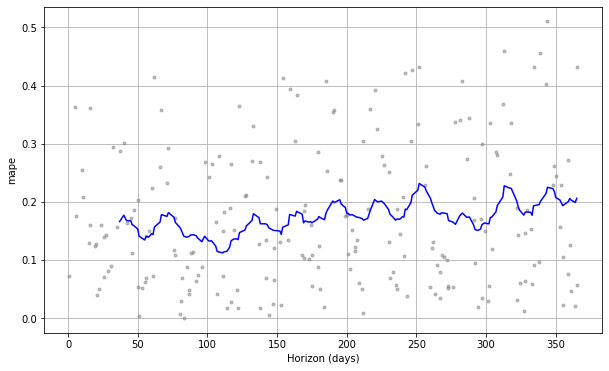

In [0]:
# Plot results below
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv_results, metric='mape');

⚠️ Don't forget to push the challenge to GitHub once you're done 😄